In [166]:
#This is risk analysis of our strategies. From historical data, for a certain day of the week and time range within that day
#it will calculate all the dates on which the pnl drops below a certain threshold.
#It will identify the closing price of the day on all those dates
#Then, we plot this closing price to see if we have statistical significance that our pnl will either become positive
#or stay negative

##### Import Libraries

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

##### Sort Data into neat DataFrame

In [168]:
df = pd.read_csv('data.csv', parse_dates=True, index_col=0)
df.drop(columns='long_gamma', inplace=True)
df = df.diff()
df['Total'] = df['SB6'] + df['SB4v2'] + df['DNIv5'] + df['DNIv6']
df.drop(columns = ['SB6', 'SB4v2', 'DNIv5', 'DNIv6'], inplace=True)
df.index = pd.to_datetime(df.index, format="%d-%m-%Y %H:%M", dayfirst=True)
df['Daily_Cumulative_PnL'] = df.groupby(df.index.date)['Total'].cumsum()
df.drop(columns = 'Total', inplace=True)
total= 800000
percent= 100
df_new = (df/total) *percent
df_new.index = pd.to_datetime(df_new.index)

##### Class to plot distribution

In [169]:
class DistributionAnalysis:
    def __init__(self, dataframe, weekday, start_time, end_time, threshold):
        self.data = dataframe
        self.weekday = weekday
        self.start_time = start_time
        self.end_time = end_time
        self.threshold = threshold
        

      
    def day_pnl_filter(self):
        day_filter = self.data[self.data.index.weekday == self.weekday]  
        filter = (day_filter.index.time >= pd.to_datetime(self.start_time).time()) & \
                (day_filter.index.time <= pd.to_datetime(self.end_time).time()) & \
                (day_filter['Daily_Cumulative_PnL'] < self.threshold)
        
        days = day_filter[filter]
        
        drop_days = days.index.normalize()

        day_filter['date'] = day_filter.index.normalize()
        df_drop_days = day_filter[day_filter['date'].isin(drop_days)]


        last_entries = df_drop_days.groupby('date').last()
        return last_entries
    
    def plot_pnl_dist(self, last_entries):
        last_entries.plot(kind='hist', figsize=(10, 6), color='teal')
        plt.title("Distribution of Closing PnL")
        plt.xlabel("Index")
        plt.ylabel("Density")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


     
        

##### We can choose now any day of the week, any time zone, and any threshold to analyse the graph

C:\Users\Guest_Account\AppData\Local\Temp\ipykernel_13664\1759726698.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_filter['date'] = day_filter.index.normalize()


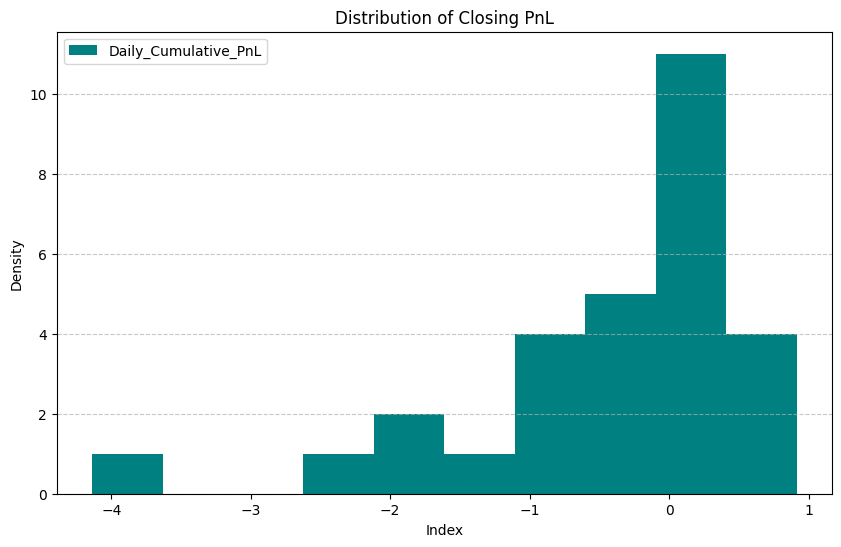

In [170]:
weekday = 3
start_time = '10:00'
end_time = '10:15'
threshold = -0.30

analysis = DistributionAnalysis(dataframe=df_new, weekday=weekday, start_time=start_time, end_time=end_time, threshold=threshold)

last_entries_series = analysis.day_pnl_filter()

analysis.plot_pnl_dist(last_entries_series)


##### Historical Probability of Ending in Negative PnL given we have have experienced the drop

In [171]:
l_e = analysis.day_pnl_filter()
l_e_neg = l_e[l_e<0].count()
l_e_tot = l_e.count()
ratio = l_e_neg / l_e_tot
ratio

C:\Users\Guest_Account\AppData\Local\Temp\ipykernel_13664\1759726698.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_filter['date'] = day_filter.index.normalize()


Daily_Cumulative_PnL    0.482759
dtype: float64